**Brian Blaylock**  
**May 17, 2019**  

# **Fig. EXTRA** May Case: count of runs forecasting lightning

Also include GOES-17 GLM

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap

from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [7.5, 5.5]
mpl.rcParams['figure.titlesize'] = 10
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['figure.subplot.wspace'] = 0.03
mpl.rcParams['figure.subplot.hspace'] = 0.02
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 600

In [2]:
mU = draw_centermap('Utah', size=(4,4))

In [3]:
m = draw_HRRR_map()
lat, lon = get_hrrr_latlon(DICT=False)

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [6]:
DATES = [datetime(2019, 5, 7, 19),
         #datetime(2019, 5, 7, 21),
         datetime(2019, 5, 7, 23),
         #datetime(2019, 5, 8, 1),
         datetime(2019, 5, 8, 3)]

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


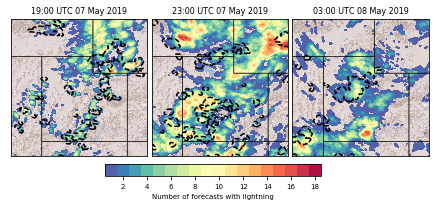

In [74]:
fig, axes  = plt.subplots(1, len(DATES))

for ax, DATE in zip(axes, DATES):
    plt.sca(ax)
    stats = get_GLM_HRRR_contingency_stats(DATE, verbose=False)
    fxx_num = np.sum(stats['Forecast Binary'], axis=0)
    fxx_masked = np.ma.array(fxx_num, mask=fxx_num==0)
    #mU.pcolormesh(lon, lat, fxx_masked, latlon=True)
    im = mU.contourf(lon, lat, fxx_masked, latlon=True, levels=range(1,20,1), cmap='Spectral_r')
    
    mU.contour(lon, lat, stats['Observed Binary'], latlon=True, levels=[0,1],
               colors='k', linestyles='--', linewidths=1.5)
    
    plt.title('%s' % DATE.strftime('%H:%M UTC %d %B %Y'))
    
    mU.arcgisimage(service='World_Shaded_Relief', xpixels=1000)   
    mU.drawstates()
    
cbar_ax = fig.add_axes([0.3, .28, 0.4, 0.03])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal',
             label='Number of forecasts with lightning')

labels = range(2,20,2)
cbar.set_ticks(np.arange(2.5, np.max(labels) + 1, 2))
cbar.ax.set_xticklabels(labels)

plt.savefig('./figs/Fig-EXTRA_May2019-Case')

In [ ]:
# Get GLM Lightning Binary for GOES-17